## Web Analytics DATA 620 - Week 05 - Part 02
## Assignment: “Document Classification”
## Group - Chris Bloome / Mustafa Telab / Vinayak Kamath
## Date - 11th JULY 2021

This week's assignment is to:

classify new "test" documents using already classified "training" documents.  A common example is using a corpus of labeled spam and ham (non-spam) e-mails to predict whether or not a new document is spam.  Here is one example of such data:  UCI Machine Learning Repository: Spambase Data Set

For this project, you can either use the above dataset to predict the class of new documents (either withheld from the training dataset or from another source such as your own spam folder).

For more adventurous students, you are welcome (encouraged!) to come up a different set of documents (including scraped web pages!?) that have already been classified (e.g. tagged), then analyze these documents to predict how new documents should be classified. 

---

In [1]:
# Importing Libraries
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB, GaussianNB

from sklearn import svm
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

In [2]:
##Step1: Load Dataset
dataframe = pd.read_csv("Spam_Ham.csv")
print(dataframe.describe())

       Label               EmailText
count   5572                    5572
unique     2                    5169
top      ham  Sorry, I'll call later
freq    4825                      30


In [3]:
dataframe.head()

,Label,EmailText
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
#counting ham and spam entries
dataframe.Label.value_counts()

ham     4825
spam     747
Name: Label, dtype: int64

The test feed has 4825 labled HAM and 747 labled SPAM data samples. 

Next we will just look at the SPAM samples and see the different words and thier frequency using the wordcloud library. 

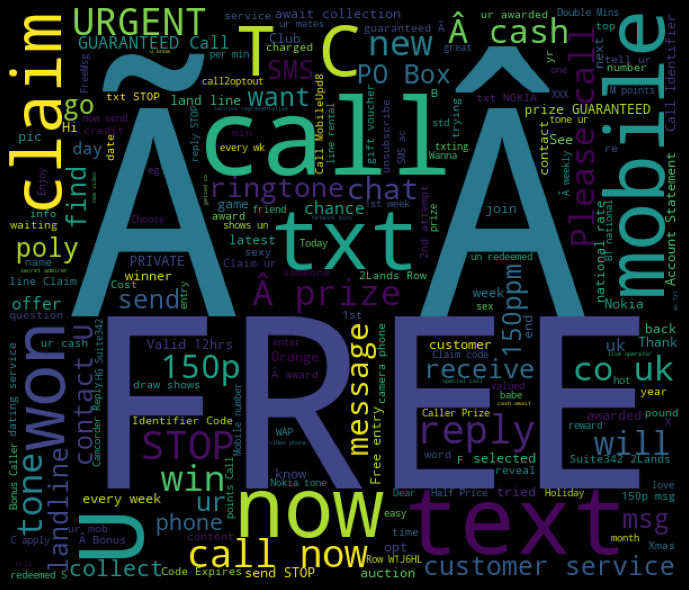

In [5]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
# dataset.drop(['labels'], axis = 1, inplace = True)
spam_words = ' '.join(list(dataframe[dataframe['Label'] == 'spam']['EmailText']))
spam_wc = WordCloud(width = 600,height = 512).generate(spam_words)
plt.figure(figsize = (12, 8), facecolor = 'k')
plt.imshow(spam_wc)
plt.axis('off')
plt.tight_layout(pad = 0)
plt.show()

Few observations that come out as obvious SPAM indications are , Upper Case texts, words like "FREE" , "WON" , "CASH" and so on..

---

Next we will split the dataset into Training and Testing Datasets. We will use the training dataset to train our MOdel and the Test dataset to then test our model. we will split the dataset 40% for test dataset and rest for Training. 

In [6]:
##Step2: Split in to Training and Test Data

x = dataframe["EmailText"]
y = dataframe["Label"]

x_train, x_test, y_train, y_test =  train_test_split(x, y, test_size=.4, random_state=42)

print("%r, %r, %r" % (x.shape, x_train.shape, x_test.shape))

(5572,), (3343,), (2229,)


In [7]:
##Step3: Extract Features
cv = CountVectorizer()  
features = cv.fit_transform(x_train)
features.shape


(3343, 6666)

In [8]:
##Step4: Build a model
tuned_parameters = {'kernel': ['rbf','linear'], 'gamma': [1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]}

model = GridSearchCV(svm.SVC(), tuned_parameters)

model.fit(features,y_train)

print(model.best_params_)

{'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}


Above we have use the gridSearch function to call the SVC Model and pass aset of tuned parameters to it. Fiting the model on our training dataset we get the best params that is used. 

Next we Test our model on the test datset. 

In [9]:
#Step5: Test Accuracy
print(model.score(cv.transform(x_test),y_test))

0.9825033647375505


In [10]:
# using predict to check the prediction done by the model 
predicted = model.predict(cv.transform(x_test))
print(predicted) 
print(y_test) 

['ham' 'ham' 'spam' ... 'ham' 'ham' 'ham']
3245     ham
944      ham
1044    spam
2484     ham
812     spam
        ... 
4746     ham
1017     ham
557      ham
3305     ham
2962     ham
Name: Label, Length: 2229, dtype: object


----


<b>Conclusion:</b>

We got a 98% prediction and that is pretty good. We can also see that the prediction and the test lables do match based on the sample shown above from the"predicted" and "y_test" samples

----

<b>Save Model:</b>
    

In [11]:
import pickle
pickle.dump(model,open("Email_spam_SVC_MN.pkl","wb"))

---

[Youtube Link](https://youtu.be/-gnkzvQQ_KA)